In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv("medical insurance.csv")
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [3]:
features = data.drop(columns=['charges'])
print(features.head())

   age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest


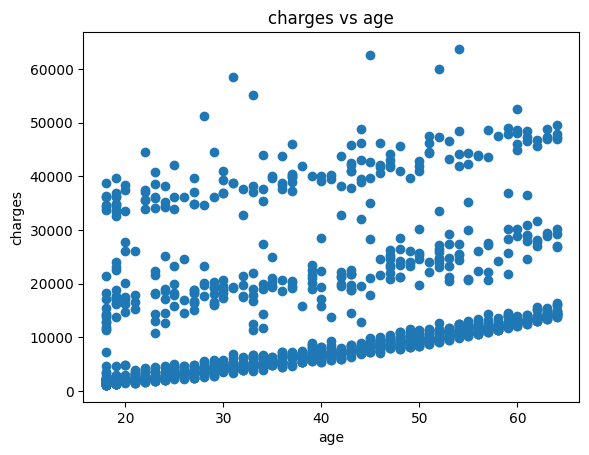

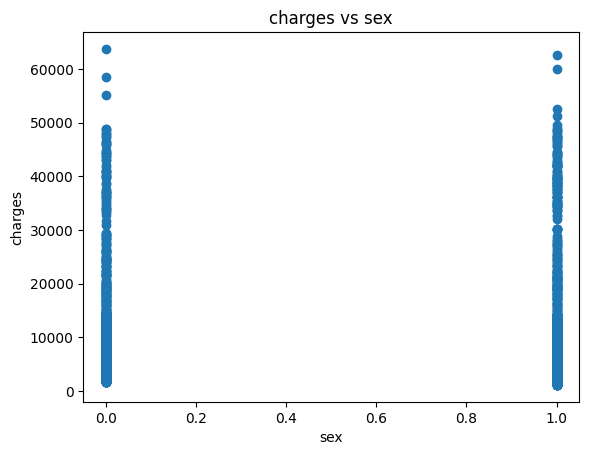

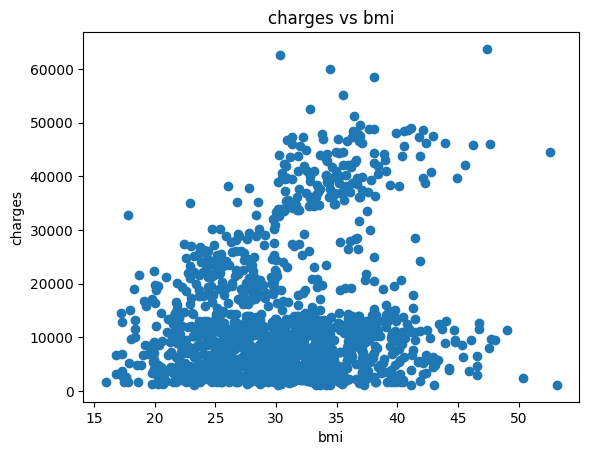

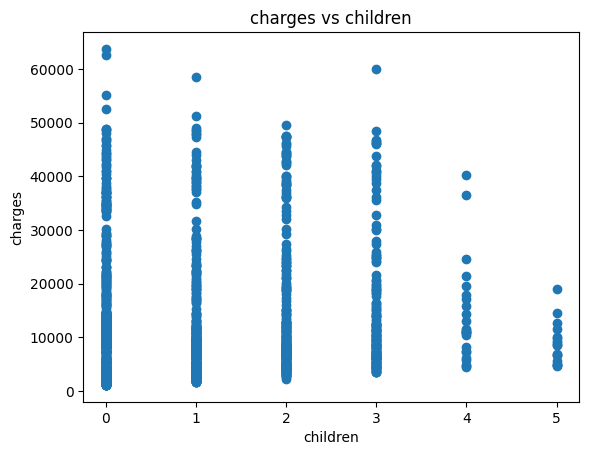

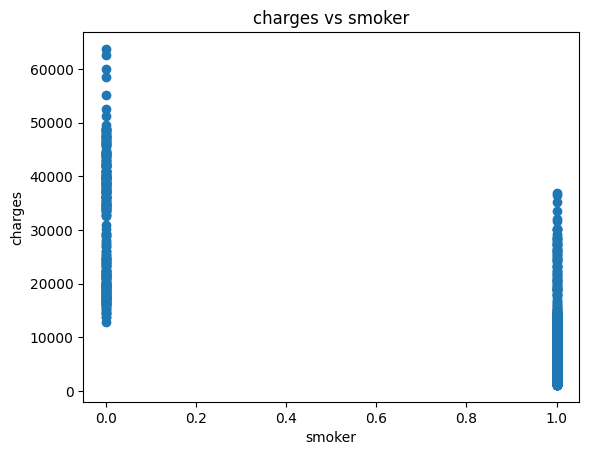

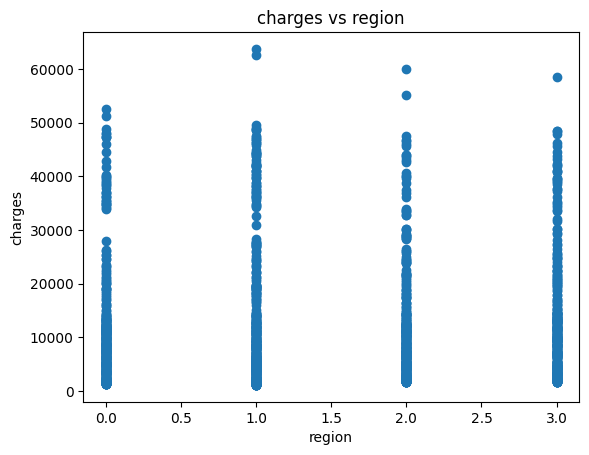

In [4]:
for feature in features.columns:
    x = features[feature]
    
    if x.dtype == 'object':
        x = pd.factorize(x)[0]
    plt.figure()
    plt.scatter(x, data['charges'])
    plt.xlabel(feature)
    plt.ylabel('charges')
    plt.title(f'charges vs {feature}')
    plt.show()

In [5]:
stats = data.groupby('sex')['bmi'].agg(['mean', 'std'])
print(stats.head())

             mean       std
sex                        
female  30.377749  6.046023
male    30.943129  6.140435


In [6]:
group_mean = data.groupby('sex')['bmi'].transform('mean')
group_std = data.groupby('sex')['bmi'].transform('std')

data['bmi normal'] = (data['bmi'] - group_mean) / group_std

print(data.head())

   age     sex     bmi  children smoker     region      charges  bmi normal
0   19  female  27.900         0    yes  southwest  16884.92400   -0.409815
1   18    male  33.770         1     no  southeast   1725.55230    0.460370
2   28    male  33.000         3     no  southeast   4449.46200    0.334972
3   33    male  22.705         0     no  northwest  21984.47061   -1.341620
4   32    male  28.880         0     no  northwest   3866.85520   -0.335991


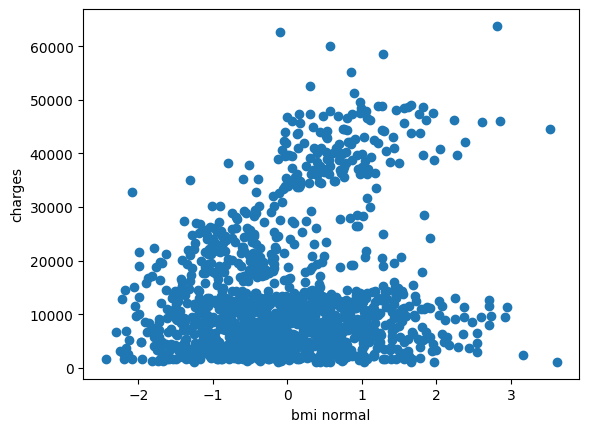

In [7]:
plt.scatter(data['bmi normal'], data['charges'])
plt.xlabel('bmi normal')
plt.ylabel('charges')
plt.show()

In [8]:

from sklearn.preprocessing import StandardScaler




In [9]:

from sklearn.decomposition import PCA

new_features = data.drop(columns = ['bmi', 'charges'])

new_features['sex'] = pd.factorize(new_features['sex'])[0]
new_features['smoker'] = pd.factorize(new_features['smoker'])[0]
new_features['region'] = pd.factorize(new_features['region'])[0]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_features)
print(new_features.head())



   age  sex  children  smoker  region  bmi normal
0   19    0         0       0       0   -0.409815
1   18    1         1       1       1    0.460370
2   28    1         3       1       1    0.334972
3   33    1         0       1       2   -1.341620
4   32    1         0       1       2   -0.335991


In [10]:

# --- Steps 2, 3, 4: Fit PCA ---
# Decide how many components you want. 
# n_components=2 means we want to reduce to 2D.
pca = PCA(n_components=3)
pca.fit(scaled_data)

# --- Step 5: Transform the Data ---
# This projects the original data onto the new 2D space
reduced_data = pca.transform(scaled_data)

# 'reduced_data' is your new dataset with 2 features instead of 4
print("Original shape:", scaled_data.shape)
print("Reduced shape:", reduced_data.shape)

# You can also see how much variance each component captured
print("Explained variance ratio:", pca.explained_variance_ratio_)

Original shape: (1338, 6)
Reduced shape: (1338, 3)
Explained variance ratio: [0.20005105 0.18096689 0.17015089]


NameError: name 'fi' is not defined

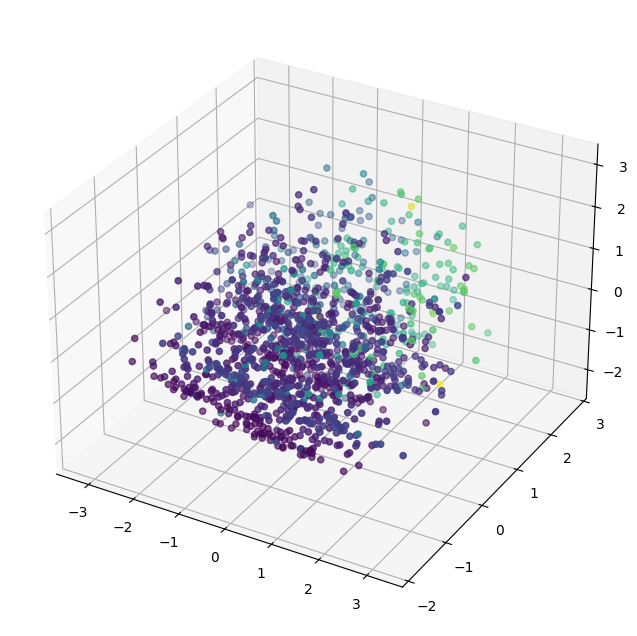

In [ ]:

#3d shape visualization
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
scat = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=data['charges'], cmap='viridis')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Medical Insurance Data')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


In [ ]:
print(new_features.head())

   age  sex  children  smoker  region  bmi normal
0   19    0         0       0       0   -0.409815
1   18    1         1       1       1    0.460370
2   28    1         3       1       1    0.334972
3   33    1         0       1       2   -1.341620
4   32    1         0       1       2   -0.335991


In [ ]:
X = new_features
y = data['charges']

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)
model.predict(X_test)

print("Model R^2 Score:", model.score(X_test, y_test))
print()

Model R^2 Score: 0.8690468884342442



ModuleNotFoundError: No module named 'mlxtend'